In [1]:
import pandas as pd
import scipy
from scipy import stats,signal
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
feature_df = pd.read_csv('total_features.csv', delimiter=',')
lambdas_df = pd.read_csv('wavelength_values.csv', delimiter=',')
feature_arr = feature_df.values
lambdas = lambdas_df.values

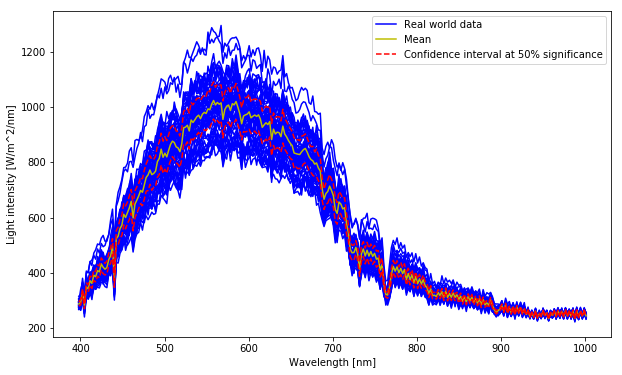

In [3]:
def noiseVisualiser(data):
    means = []
    std = []
    means_idx=[]
    idx_disp = []
    upper_CIs = []
    lower_CIs = []
    for i in range(len(data)):
        means.append(np.mean(data[i]))
        std.append(np.std(data[i]))
        means_idx.append(i)
        idx_disp.append(np.std(data[i])**2/np.mean(data[i]))
        

    for i in range(len(means)):
        upper_CIs.append(stats.norm.interval(0.50, loc=means[i], scale=std[i])[0])        
        lower_CIs.append(stats.norm.interval(0.50, loc=means[i], scale=std[i])[1])
    
    return means, std,idx_disp,  upper_CIs, lower_CIs



means, std,idx_disp,  upper_CIs, lower_CIs = noiseVisualiser(feature_arr)


feature_arr_T = feature_arr.T

fig = plt.figure(figsize=(10, 6))
for i in range(len(feature_arr_T)-1):
    plt.plot(lambdas,feature_arr_T[i], '-b')
plt.plot(lambdas,feature_arr_T[51], '-b', label ='Real world data')


plt.plot(lambdas,means, '-y', label = 'Mean')
plt.plot(lambdas,upper_CIs, "--r", label = 'Confidence interval at 50% significance')
plt.plot(lambdas,lower_CIs, "--r")


plt.legend(loc="upper right")
plt.ylabel('Light intensity [W/m^2/nm]')
plt.xlabel('Wavelength [nm]')
plt.savefig('rwd_total.jpg')

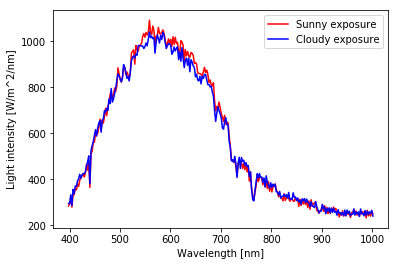

In [4]:
plt.plot(lambdas,feature_arr_T[3], '-r', label ='Sunny exposure')
plt.plot(lambdas,feature_arr_T[51], '-b', label ='Cloudy exposure')
plt.legend(loc="upper right")
plt.ylabel('Light intensity [W/m^2/nm]')
plt.xlabel('Wavelength [nm]')
plt.savefig('data_qual_issues.jpg')



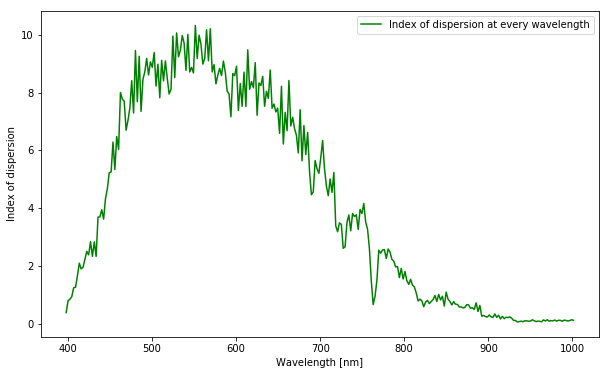

In [5]:
fig = plt.figure(figsize=(10, 6)) # normalized var
plt.plot(lambdas,idx_disp,'-g', label = 'Index of dispersion at every wavelength')
plt.legend(loc="upper right")
plt.ylabel('Index of dispersion')
plt.xlabel('Wavelength [nm]')
plt.savefig('disp.jpg')

In [6]:
cov = np.cov(feature_arr)

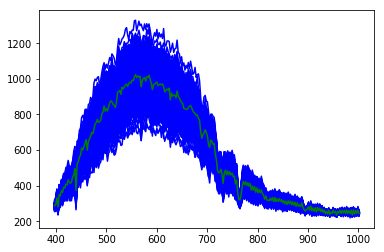

(500, 272)
(272,)
(272, 1)


In [7]:
it = 500
x = np.random.multivariate_normal(means,cov, it)
for i in range(it):
    plt.plot(lambdas, x[i] , '-b',label = "generated spectra")
    
plt.plot(lambdas,means, '-g', label = "true mu")
plt.show()

#np.savetxt("generated_data.csv", x, delimiter=",")

In [8]:
# PCA noise reduction

pca = PCA(0.70).fit(feature_arr_T)
pca.n_components_

components = pca.transform(feature_arr_T)
filtered = pca.inverse_transform(components)


272


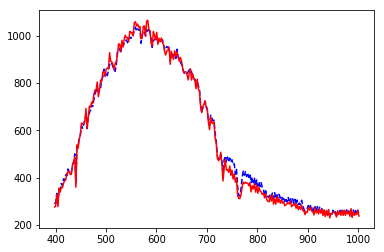

In [12]:
for i in range(1):
    plt.plot(lambdas, filtered[i], '--b')
    plt.plot(lambdas, feature_arr_T[i], '-r')  

In [16]:
# Savitzy_golay filtering
from scipy.signal import savgol_filter
SF_arr = scipy.signal.savgol_filter(feature_arr_T, 55, 10)



In [17]:
# Weiner filtering (not used in report)

W_arr = scipy.signal.wiener(feature_arr_T, mysize=None, noise=None)


280.33516897118255
139.0526075848609


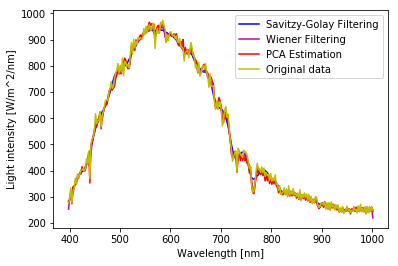

In [18]:
#plot for a given image (randomly chosen)


i = 25

plt.plot(lambdas, SF_arr[i], '-b', label = 'Savitzy-Golay Filtering')
plt.plot(lambdas, W_arr[i], '-m', label = 'Wiener Filtering')
plt.plot(lambdas, filtered[i], '-r', label = 'PCA Estimation')
plt.plot(lambdas, feature_arr_T[i], '-y', label = 'Original data')
plt.legend(loc="upper right")
plt.ylabel('Light intensity [W/m^2/nm]')
plt.xlabel('Wavelength [nm]')
plt.savefig('noise_red.jpg')



print(np.std(feature_arr_T))
print(np.std(SF_arr))
print(np.std(filtered))
print(np.std(feature_arr_T)**2/np.mean(feature_arr_T))
print(np.std(SF_arr)**2/np.mean(SF_arr))
print(np.std(filtered)**2/np.mean(filtered))
